<a href="https://colab.research.google.com/github/Chen-Portfolio/Examining-Spending-Behavior-Over-Age-/blob/main/Examining_Spending_Behavior_over_Age_by_Three_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

## Dataset contains customers' spend and age, and the project is to figure out how spending habits change with age for customers, and how well different models can capture the relationship

# Import Libraries and Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('age_spend.csv')

In [ ]:
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.describe()

,spend,age
count,1000.000000,1000.00000
mean,2907.468000,39.99600
std,168.091534,9.55538
min,2073.000000,18.00000
25%,2832.500000,33.00000
50%,2934.000000,40.00000
75%,3017.000000,47.00000
max,3274.000000,70.00000


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['age']].values
y= df[['spend']].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [ ]:
type(X)

numpy.ndarray

# Apply DecisionTree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

max2_tree_model = DecisionTreeRegressor(max_depth = 2)
max2_tree_model.fit(X_train, y_train)

max5_tree_model = DecisionTreeRegressor(max_depth = 5)
max5_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Apply Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate Two Modelds by Metrics

In [ ]:
from sklearn.metrics import mean_squared_error

linear_predictions = linear_model.predict(X_test)
print('Linear RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))

max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))

max5_tree_predictions = max5_tree_model.predict(X_test)
print('Tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Linear RMSE: 159.35769095355172
Tree with max depth of 2 RMSE: 129.1257035576988
Tree with max depth of 5 RMSE: 112.33385352251217


## Result: decision tree with depth of 5 has the least error

# Evaluate the Results by Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ages = pd.DataFrame({'age': range(18, 70)})

## Visualize Results of Linear Model

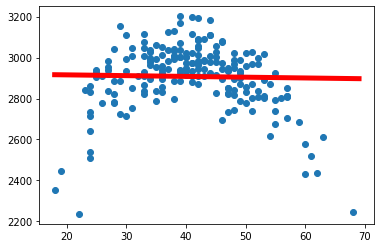

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(ages,linear_model.predict(ages), color='r', linewidth=5)
plt.show()


### Results:  


> Shows the predictions as a flat line of the linear regression model across the age range


> It's unable to capture the fact that ppl aged around 40 spend more while younger and older than 40 spend less

## Visualize Results of Tree Model by depth of 2

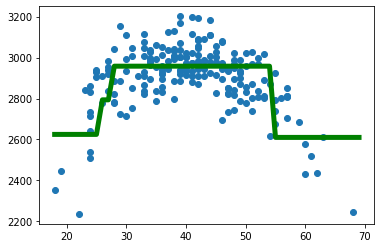

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(ages,max2_tree_model.predict(ages), color='g',linewidth=5)
plt.show()

### Results:


> This model does a better job of capturing the relationship though it does not capture the sharp increase and decrease in the youngest and oldest population



## Visualize Results of Tree Model by depth of 5

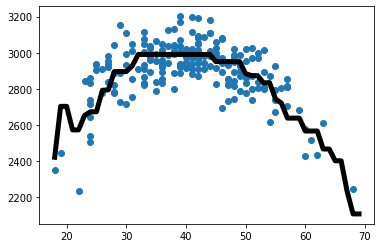

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(ages,max5_tree_model.predict(ages), color='k',linewidth=5)
plt.show()

### Results:


> This model does a even better job of capturing the relationship properly 



# Apply Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

max2_forest_model = RandomForestRegressor(max_depth=2, random_state=10)
max2_forest_model.fit(X_train,y_train)

max5_forest_model = RandomForestRegressor(max_depth=5, random_state=10)
max5_forest_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

## Evaluate the Model by Metrics

In [ ]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + str(mean_squared_error(max2_forest_predictions, y_test)**0.5))

max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + str(mean_squared_error(max5_forest_predictions, y_test)**0.5))

Max depth of 2 RMSE: 119.1779052503668
Max depth of 5 RMSE: 111.70349770960156


### Result: both better than DecisionTree Model

## Evaluate the Model by Visualization

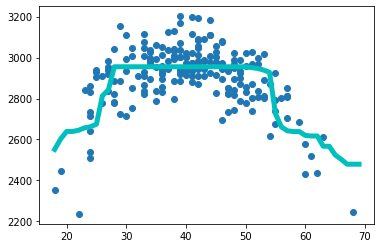

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(ages,max2_forest_model.predict(ages), color='c',linewidth=5)
plt.show()

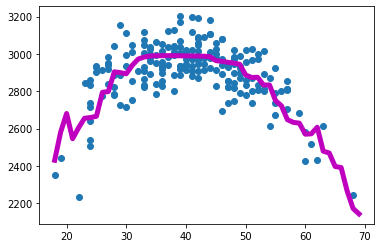

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(ages,max5_forest_model.predict(ages), color='m',linewidth=5)
plt.show()